In [2]:
#Import necessary libraries for the CNN analysis
import patoolib
patoolib.extract_archive("CarData.tar.gz", outdir="C:\\Users\\Lokesh Vairamuthu\\Desktop\\Machine_Learning Datasets\\Car Image Classification")

import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from keras.models import Sequential
from keras.layers import Activation, add, Dropout, Dense, Conv2D, MaxPooling2D, Flatten
from sklearn.preprocessing import MinMaxScaler
from scipy import ndimage, misc

C:\Users\Lokesh Vairamuthu\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
#Unzip the file from the original dataset from Kaggle and import all the images split as training folders.
#The folder contain cars and not cars images
path_train = r"C:\\Users\\Lokesh Vairamuthu\\Desktop\\Machine_Learning Datasets\\Car Image Classification\\CarData\\TrainImages"

#The images are all grey car images and the directory is framed for the plotting of all the images into an array format
grey_img_train = os.listdir(path_train)
grey_img_path_train = grey_img_train
for i in range(0,len(grey_img_train)):
    grey_img_path_train[i] = os.path.abspath(os.path.join(path_train,grey_img_train[i]))

In [4]:
#Unzip the file from the original dataset from Kaggle and import all the images split as testing folders.
#The first test folder contain cars and not cars images in which some are of different scales over the training images
path_test1 = r"C:\\Users\\Lokesh Vairamuthu\\Desktop\\Machine_Learning Datasets\\Car Image Classification\\CarData\\TestImages"
grey_img_test1 = os.listdir(path_test1)
grey_img_path_test1 = grey_img_test1
for i in range(0,len(grey_img_test1)):
    grey_img_path_test1[i] = os.path.abspath(os.path.join(path_test1,grey_img_test1[i]))

#The second test folder contain cars and not cars images in which some all are of different scales over the training images
path_test2 = r"C:\\Users\\Lokesh Vairamuthu\\Desktop\\Machine_Learning Datasets\\Car Image Classification\\CarData\\TestImages_Scale"
grey_img_test2 = os.listdir(path_test2)
grey_img_path_test2 = grey_img_test2
for i in range(0,len(grey_img_test2)):
    grey_img_path_test2[i] = os.path.abspath(os.path.join(path_test2,grey_img_test2[i]))

In [5]:
#Converting all the training images into a numpy array with 3 dimension of "length of the array x 40 x 100"
img_train = np.zeros([1050,40,100])
for i in range(0,len(grey_img_path_train)):
    img_train[i]=mpimg.imread(grey_img_path_train[i])

In [6]:
#Converting all the testing images into a numpy array with 3 dimension reshaping them to the shape of
#"length of the array x 40 x 100 (same as the training images)

img_test1 = np.zeros([170,40,100])
for i in range(0,len(grey_img_path_test1)):
    aa=mpimg.imread(grey_img_path_test1[i])
    img_test1[i] = np.resize(aa, (40,100))
    
img_test2 = np.zeros([108,40,100])
for i in range(0,len(grey_img_path_test2)):
    bb=mpimg.imread(grey_img_path_test2[i])
    img_test2[i] = np.resize(bb, (40,100))

In [7]:
#We rehsape the images again into a four dimensional array as it is the dimension that the CNN will work for. 
#Dividing the pixel values by 255 to scale all the images between 0 and 1

X_train = img_train
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_train_scale = X_train/255

#As we have 2 test image folders, we concatenate both to form one single test folder performing the same procedure as the
#training dataset.

X_test1 = img_test1
X_test1 = X_test1.reshape(X_test1.shape[0], X_test1.shape[1], X_test1.shape[2], 1)
X_test1_scale = X_test1/255

X_test2 = img_test2
X_test2 = X_test2.reshape(X_test2.shape[0], X_test2.shape[1], X_test2.shape[2], 1)
X_test2_scale = X_test2/255

#We manually create a dependent array of labels for car(1) and for Not-car(0).
z = np.zeros([500,1])
x = np.zeros([550,1])
x.fill(1)
y_train_scale = np.concatenate((z,x), axis=0)

In [9]:
#We build a CNN with 2 filter and Maxpooling layers to filter the structure of the image array formed. We consistently use the 
#"ReLu" activation function as it is the most prefered for classification as it as the highest convergence than other methods.

#We use a 32 layer filter, with the pregressive localizer of 3x3.
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape = (40, 100, 1), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
#We flatten the complex array formed to a single column array to have all the cells being mapped to the hidden deep neural networks
model.add(Flatten())

#We use a simple 3 hidden layer NN with using dropout of 0.2 to minimize the overfit of the model.
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 16, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 4, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1, activation = 'sigmoid'))

#Finally we compile the added Neural Network layers to give us the LOM of ANN compilation. Since we map the final output to be
#either to be a car or not. we use the loss function as "binary_crossentropy". The "adam" optimizer is the most effective classifer optimizer function
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [10]:
#We then fit the train image dataset with the training labels.
C1 = model.fit(X_train_scale, y_train_scale, epochs=150, batch_size=150,  verbose=1)

Epoch 1/150
1050/1050 [==============================] - 6s 6ms/step - loss: 0.6848 - acc: 0.5229
Epoch 2/150
1050/1050 [==============================] - 5s 5ms/step - loss: 0.6391 - acc: 0.6038
Epoch 3/150
1050/1050 [==============================] - 5s 5ms/step - loss: 0.5577 - acc: 0.7267
Epoch 4/150
1050/1050 [==============================] - 5s 5ms/step - loss: 0.3984 - acc: 0.8114
Epoch 5/150
1050/1050 [==============================] - 5s 5ms/step - loss: 0.3070 - acc: 0.8229
Epoch 6/150
1050/1050 [==============================] - 5s 5ms/step - loss: 0.2456 - acc: 0.9105
Epoch 7/150
1050/1050 [==============================] - 5s 5ms/step - loss: 0.2101 - acc: 0.9371
Epoch 8/150
1050/1050 [==============================] - 5s 5ms/step - loss: 0.1724 - acc: 0.9362
Epoch 9/150
1050/1050 [==============================] - 5s 5ms/step - loss: 0.1806 - acc: 0.9390
Epoch 10/150
1050/1050 [==============================] - 5s 5ms/step - loss: 0.1604 - acc: 0.9638
Epoch 11/150
1050/1

dict_keys(['loss', 'acc'])


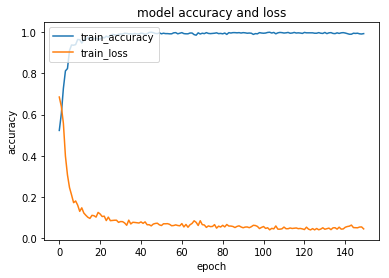

In [11]:
#We plot the loss and the accuracy of the model.
print(C1.history.keys())
# summarize history for accuracy
plt.plot(C1.history['acc'])
plt.plot(C1.history['loss'])
plt.title('model accuracy and loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'train_loss'], loc='upper left')
plt.show()

In [22]:
#The Model evaluation of testing the test images whether or not the image is a car or not, the model predicts the first 
#scaled test images with 97.05% accuracy while the model predicts the not scaled second test images with 94.44% accuracy

y_pred1 = model.predict(X_test1)
Y_pred2 = model.predict(X_test2)

score1 = model.evaluate(X_test1_scale, y_pred1)
score2 = model.evaluate(X_test2_scale, Y_pred2)
print("The models loss for the Test images from the classification model :  %f" %score1[0] + "\n" + "The models accuracy for the Test images from the classification model : %f" %(score1[1]*100))

print("The models loss for the Test images with scaled images from the classification model :  %f" %score2[0] + "\n" + "The models accuracy for the Test images with scaled images from the classification model : %f" %(score2[1]*100))

108/108 [==============================] - 0s 2ms/step
The models loss for the Test images from the classification model :  0.091939
The models accuracy for the Test images from the classification model : 97.058824
The models loss for the Test images with scaled images from the classification model :  0.120233
The models accuracy for the Test images with scaled images from the classification model : 94.444444
